In [2]:
import pandas as pd

La magia de matplotlib notebook, es muy útil para hacer plots más visibles, pero es un poco complicada de usa, ya que require cerrar cada plot para poder continuar.

Alternativamente, se puede usar la magia de %matplotlib inline, que es más sencilla, ya que simplemente muestra el gráfico original en jupyter notebook. Para modificar el tamaño de los plots en este caso, basta con cambiar el parámetro general de matplotlib figure.figsize al tamaño de gráfico deseado (en pulgadas).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10) 

En este apartado vamoas a revisar el dataset. El objetibvo será tener un dataset lo más parecido al original, pero sin fallos en el mismo que puedan llevarnos a sacar conclusiones erróneas.

El input de ete paso es el output del anterior.

In [3]:
vehiculos = pd.read_csv("./vehiculos.1.procesado_inicial.csv")

In [15]:
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500
5,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
6,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500


In [4]:
vehiculos.shape

(38436, 11)

#### Duplicados
En este apartado se intentan ver dos cosas:

- Asegurarse de que los datos que no deberían estar duplicados no lo están (ejemplo, números de teléfono)
- Revisar si hay columnas que tengan un alto número de duplicados, ya que no aportan mucha información

Recordemos que las entidades posibles eran:

* fabricante
* fabricante-modelo
* fabricante-modelo-año
* fabricante-año

De estas entidades, las únicas que no se deberían repetir coches específicos, es decir, fabricante-modelo-año


In [16]:
vehiculos["modelo_unico"] = vehiculos.fabricante.str.cat([vehiculos.modelo, vehiculos.year.apply(str)], sep="-")

In [17]:
vehiculos.modelo_unico.value_counts()

Jeep-Cherokee/Wagoneer-1985               19
Ford-F150 Pickup 2WD-1984                 16
GMC-S15 Pickup 2WD-1984                   16
Chevrolet-C10 Pickup 2WD-1984             16
GMC-C15 Pickup 2WD-1984                   16
                                          ..
Jaguar-Vanden Plas-2001                    1
Jaguar-Vanden Plas-2002                    1
Jaguar-Vanden Plas-2003                    1
Jaguar-Vanden Plas S.C.-1999               1
smart-fortwo electric drive coupe-2016     1
Name: modelo_unico, Length: 17448, dtype: int64

Nos damos cuenta de que hay muchos repetidos.

In [10]:
vehiculos[vehiculos.modelo_unico=="Chevrolet-C1500 Pickup 2WD-1991"].head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,modelo_unico
4957,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Automatic 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4958,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Manual 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4959,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Manual 5-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4961,Chevrolet,C1500 Pickup 2WD,1991,5.0,8.0,Automatic 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,15,592.466667,Chevrolet-C1500 Pickup 2WD-1991
4962,Chevrolet,C1500 Pickup 2WD,1991,5.0,8.0,Manual 5-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,16,555.437500,Chevrolet-C1500 Pickup 2WD-1991


Como vemos, cada modelo único tiene diferentes configuraciones de cada coche (por ejemplo, 3 o 4 velocidades)
Por lo tanto, solo vamos a considerar duplicados aquellos que sean idénticos a todas sus columnas

In [11]:
vehiculos[vehiculos.duplicated()].shape

(0, 12)

Vemos que hay 1506 duplicados, podemos eliminarlos para el resto del análisis, ya que pueden distorsionar las conclusiones

In [9]:
vehiculos = vehiculos.drop_duplicates()
vehiculos.shape

(36930, 12)

Borramos la columna modelo_unico

In [18]:
del vehiculos["modelo_unico"]

Ahora falta ver si hay variables en las que haya una gran cantidad de records que tengan el mismo valor (cardinalidad)

In [19]:
n_records = len(vehiculos)
def valores_duplicados_col(df):
    for columna in df:
        n_por_valor = df[columna].value_counts()
        mas_comun = n_por_valor.iloc[0]
        menos_comun = n_por_valor.iloc[-1]
        print("{} | {}-{} | {}".format(
            df[columna].name,
            round(mas_comun / (1.0 * n_records), 3),
            round(menos_comun / (1.0 * n_records), 3),
            df[columna].dtype
        ))
        
valores_duplicados_col(vehiculos)

fabricante | 0.1-0.0 | object
modelo | 0.005-0.0 | object
year | 0.038-0.007 | int64
desplazamiento | 0.095-0.0 | float64
cilindros | 0.38-0.0 | float64
transmision | 0.287-0.0 | object
traccion | 0.353-0.005 | object
clase | 0.145-0.0 | object
combustible | 0.652-0.0 | object
consumo | 0.097-0.0 | int64
co2 | 0.084-0.0 | float64


Vemos que los campos traccion, transmission, cilindros y combustible pueden tener un problema de valores repetidos, en realidad, 30% no es significativo, sería distinto si el valor más común tuviera un 90%

In [20]:
vehiculos.traccion.value_counts(normalize=True)

Front-Wheel Drive             0.360280
Rear-Wheel Drive              0.352863
4-Wheel or All-Wheel Drive    0.177345
All-Wheel Drive               0.062325
4-Wheel Drive                 0.030886
2-Wheel Drive                 0.011402
Part-time 4-Wheel Drive       0.004899
Name: traccion, dtype: float64

Vemos que esto tiene sentido, ya que la inmensa mayoría de los vehículos tienen tracción a dos ruedas, sean delanteras o traseras. 

En este caso, alguien con conocimiento de dominio podría darse cuenta de que probablemente 2-Wheel Drive sea simplemente una clasificación dsitinta de Front o Rear.

<AxesSubplot:>

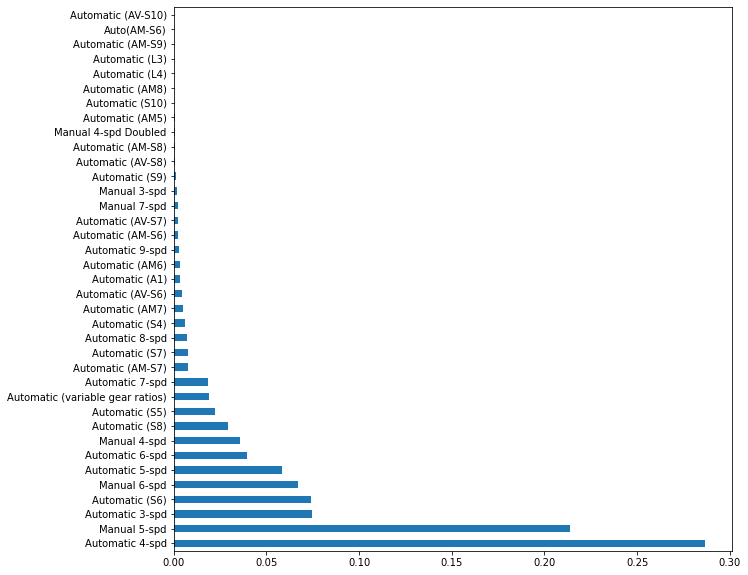

In [21]:
vehiculos.transmision.value_counts(normalize=True).plot.barh()

Vemos que aunque transmision tenga una cardinalidad relativamente alta, en realidad muestra una distribución de tipos, con dos clases mayoritarias.

<AxesSubplot:>

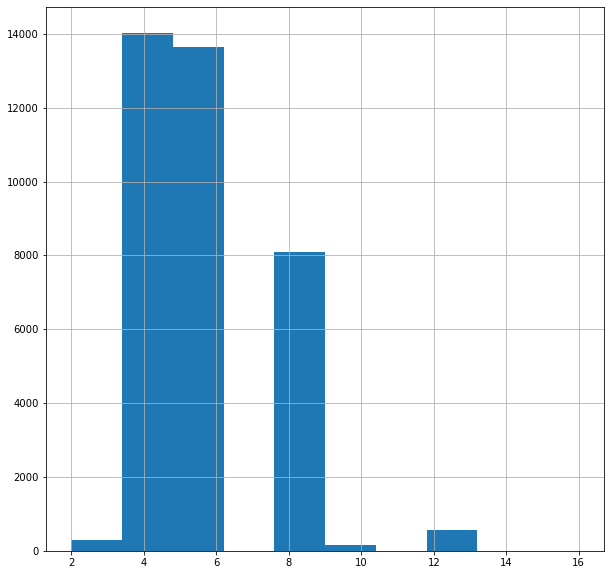

In [22]:
vehiculos.cilindros.hist()

<AxesSubplot:>

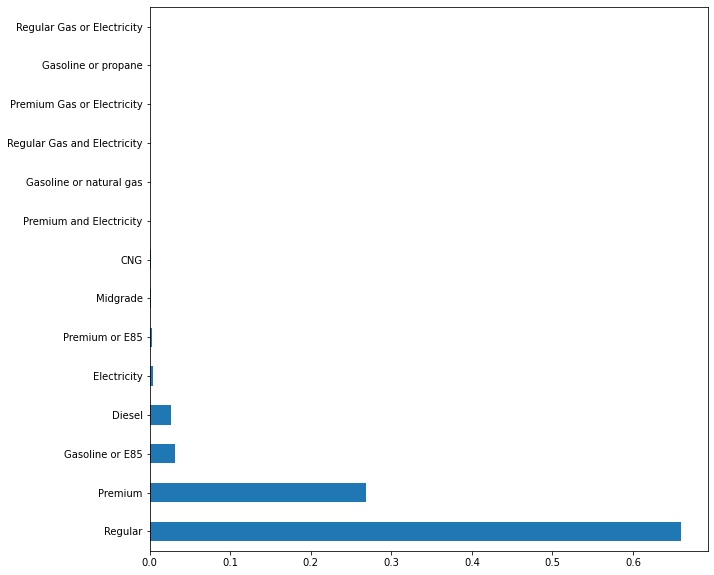

In [22]:
vehiculos.combustible.value_counts(normalize=True).plot.barh()

Vemos que la columna combustible si puede tener un problema al tener el 65% de los casos gasolina Regular.

### Valores inexistentes


In [23]:
n_records = len(vehiculos)
def valores_inexistentes_col(df):
    for columna in df:
        print("{} | {} | {}".format(
            df[columna].name, len(df[df[columna].isnull()]) / (1.*n_records), df[columna].dtype
        ))

valores_inexistentes_col(vehiculos)

fabricante | 0.0 | object
modelo | 0.0 | object
year | 0.0 | int64
desplazamiento | 0.0037909558624424585 | float64
cilindros | 0.003845112374763065 | float64
transmision | 0.00029786081776333605 | object
traccion | 0.02158137015976171 | object
clase | 0.0 | object
combustible | 0.0 | object
consumo | 0.0 | int64
co2 | 0.0 | float64


Vemos que campo traccion, cilindros y transmision tienen valores inexistentes. Sin embargo, son cantidades despreciables( el máximo es la variable tracción con un 3% inexistente)

### Valores extresmos (outliers)

para detectar valores extremos, una medida general es considerar outliers aquellos valores con una puntuación Z (z score) mayor de 3, esto es, que se alejan 3 veces o más desviaciones estándar de la media.

El z score se define como $ z(x) = \frac{x-\mu}{\sigma} $

In [24]:
from scipy import stats 
import numpy as np

def outliers_col(df):
    for columna in df:
        if df[columna].dtype != object:
            n_outliers = len(df[np.abs(stats.zscore(df[columna])) > 3])
            print("{} | {} | {}".format(
                df[columna].name,
                n_outliers,
                df[columna].dtype
            ))
outliers_col(vehiculos)

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 233 | int64
co2 | 358 | float64


Vemos que las variables de consumo de co2 tienen outliers. Podemos hacer un boxplot para visualizar esto mejor.

<AxesSubplot:>

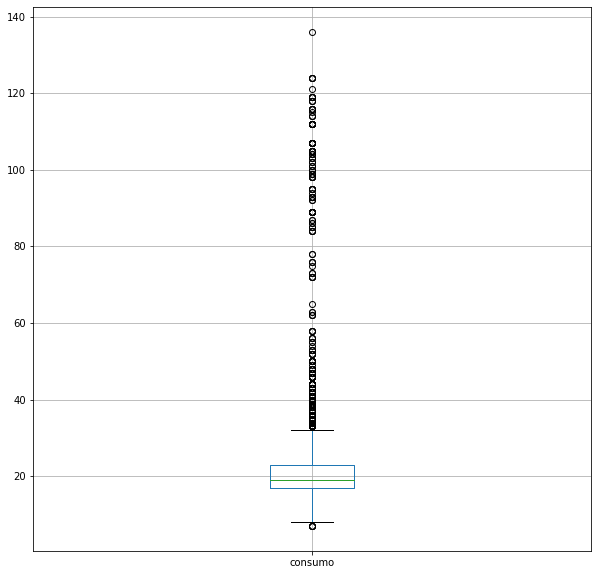

In [32]:
vehiculos.boxplot(column="consumo")

<AxesSubplot:>

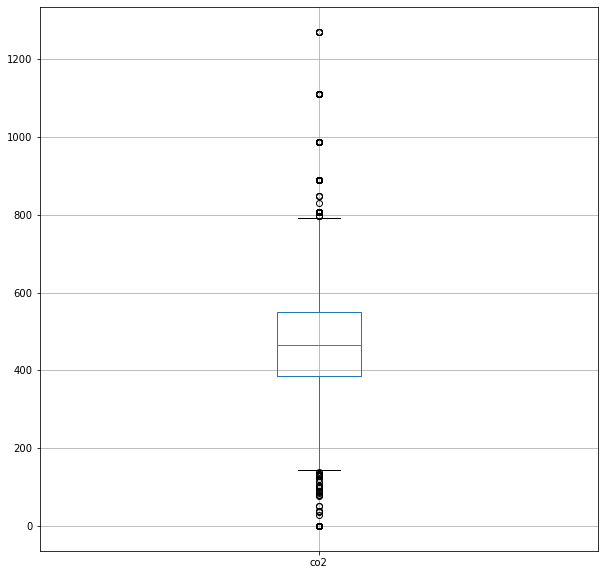

In [33]:
vehiculos.boxplot(column="co2")

Vemos que en cuanto a consumo, hay algunos que consumen más de lo normal y otros que consumen menos de lo normal, también vemos que hay coches qe no contaminan nada.

Es posible que haya coches que no usen gasolina?

In [25]:
vehiculos[vehiculos.co2 == 0].combustible.unique()

array(['Electricity'], dtype=object)

In [26]:
vehiculos.combustible.unique()

array(['Regular', 'Premium', 'Diesel', 'Premium and Electricity',
       'Premium or E85', 'Electricity', 'Premium Gas or Electricity',
       'Gasoline or E85', 'Gasoline or natural gas', 'CNG',
       'Regular Gas or Electricity', 'Midgrade',
       'Regular Gas and Electricity', 'Gasoline or propane'], dtype=object)

Vemos que en este dataset hay vehiculos híbridos y vehículos eléctricos puros. Dado que el objetivo es la contaminación, convendría remover al menos aquellos vehículos que no contaminan.

In [27]:
vehiculos_no_electricos = vehiculos[vehiculos.co2 > 0]

Ya que hemos descubierto esto, volvamos a revisar los datos con el nuevo dataset.

In [28]:
outliers_col(vehiculos_no_electricos)

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 400 | int64
co2 | 221 | float64


In [29]:
valores_duplicados_col(vehiculos_no_electricos)

fabricante | 0.099-0.0 | object
modelo | 0.005-0.0 | object
year | 0.038-0.007 | int64
desplazamiento | 0.095-0.0 | float64
cilindros | 0.38-0.0 | float64
transmision | 0.287-0.0 | object
traccion | 0.351-0.005 | object
clase | 0.145-0.0 | object
combustible | 0.652-0.0 | object
consumo | 0.097-0.0 | int64
co2 | 0.084-0.0 | float64


In [30]:
valores_inexistentes_col(vehiculos)

fabricante | 0.0 | object
modelo | 0.0 | object
year | 0.0 | int64
desplazamiento | 0.0037909558624424585 | float64
cilindros | 0.003845112374763065 | float64
transmision | 0.00029786081776333605 | object
traccion | 0.02158137015976171 | object
clase | 0.0 | object
combustible | 0.0 | object
consumo | 0.0 | int64
co2 | 0.0 | float64


Ahora vemos que no hay valores inexistentes extremos en ninguna variable. La variable con mayor número de valores inexistenes es traccion (2%).

Obviamente, los coches eléctricos no tienen motor a gasolina y por lo tanto, no tienen cilindros.

### Conclusión

- Hay 1506 records duplicados (los hemos removido).
- Las variables desplazamiento, cilindros, transmision y traccion tienen valores inexistentes
- La variable combustible tiene un clase dominante (65% de coches tienen combustible Regular)
- Hay un outlier en la cantidad de cochces con variable year de 2018
- Hay coches híbridos y coches electrícos (hemos removido estos últimos ya que no contaminan)

In [31]:
vehiculos_no_electricos.to_csv("vehiculos.2.limpio_analisis.csv", index=False)